In [2]:
import torch
import requests
from PIL import Image
from diffusers import StableDiffusionDepth2ImgPipeline
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Empty CUDA
torch.cuda.empty_cache()

pipe = StableDiffusionDepth2ImgPipeline.from_pretrained(
   "stabilityai/stable-diffusion-2-depth",
   torch_dtype=torch.float16,
).to("cuda")


Loading pipeline components...: 100%|██████████| 7/7 [00:04<00:00,  1.51it/s]


In [4]:
url = "http://images.cocodataset.org/val2017/000000039769.jpg"
init_image = Image.open(requests.get(url, stream=True).raw)

prompt = "two tigers"
n_propmt = "bad, deformed, ugly, bad anotomy"
image = pipe(prompt=prompt, image=init_image, negative_prompt=n_propmt, strength=0.7).images[0]

100%|██████████| 35/35 [00:04<00:00,  7.15it/s]


In [5]:
def show_images(im1, im2):
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(im1)
    plt.title('Image 1')

    plt.subplot(1, 2, 2)
    plt.imshow(im2)
    plt.title('Image 2')

    plt.show()

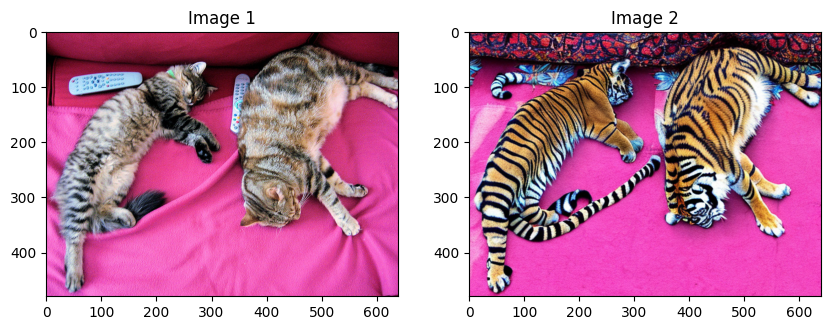

In [6]:
show_images(init_image, image)

In [7]:
import pickle
import numpy as np

# Step 1: Load the dataset
with open('data/dataset.pkl', 'rb') as file:
    dataset = pickle.load(file)

In [8]:
image_data = np.array(dataset["episode_0"][0]["observation"]["front_image"])

print("Shape:", image_data.shape)
print("Data type:", image_data.dtype)

init_image = Image.fromarray(image_data[0])

Shape: (8, 256, 256, 3)
Data type: uint8


In [17]:
prompt = "A robotic arm"
n_propmt = "bad, deformed, ugly, bad anotomy, irreal"
image = pipe(prompt=prompt, image=init_image, negative_prompt=n_propmt, strength=0.7, guidance_scale=2, num_inference_steps=50).images[0]

100%|██████████| 35/35 [00:01<00:00, 23.46it/s]


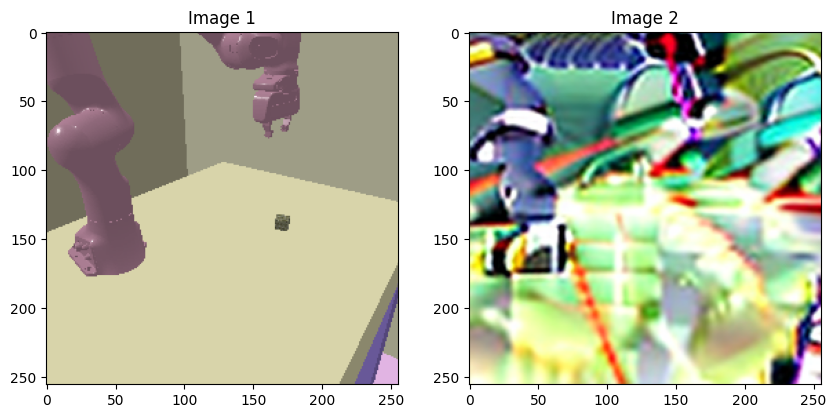

In [16]:
show_images(init_image, image)